**Project Overview: Daily Physical Activity Analysis**

*Goal* : Analyze the Daily Activity dataset to understand daily physical activity patterns, create a predictive model for calories burned, and derive actionable insights.

We are using the dataset Activity.csv from a fitness tracker app contains user-specific data recorded daily. It includes metrics such as steps taken, total distance covered, distances for various activity levels (very active, moderately active, etc.), active minutes for different intensity levels, sedentary minutes, and estimated calories burned. These metrics provide insights into users' physical activity levels and overall health behaviors.

Step 1: Create a New Folder:

Go to your Documents or any other location where you want to keep your project files.
Right-click and select New > Folder.
Name the folder something like Daily_Activity_Project.

Step 2: Move the Dataset:

Move the downloaded dataset file (e.g., daily_activity.csv) into the Daily_Activity_Project folder.

Step 3: Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Step 4:  Load the Dataset

In [5]:
# Load the Daily Activity dataset
data = pd.read_csv('/content/Daily_Activity_Project /daily_activity.csv')

Step 5: Explore the Dataset

In [6]:
# Display the first 5 rows of the dataset
print(data.head())

       UserID       Date  Total_Distance  Tracker_Distance  \
0  6117666160  4/20/2016            8.02              8.02   
1  1644430081  4/13/2016            5.82              5.82   
2  1927972279  4/25/2016            0.11              0.11   
3  6117666160  4/26/2016            7.21              7.21   
4  4388161847   5/9/2016            7.86              7.86   

   Logged_Activities_Distance  Very_Active_Distance  \
0                         0.0                  2.03   
1                         0.0                  2.28   
2                         0.0                  0.00   
3                         0.0                  0.00   
4                         0.0                  0.34   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.48                   5.52   
1                        0.90                   2.64   
2                        0.00                   0.11   
3                        0.34                   6.87   
4               

Step 6: Data Analysis Steps

In [8]:
# Check for missing values in the dataset
print(data.isnull().sum())


UserID                        0
Date                          0
Total_Distance                0
Tracker_Distance              0
Logged_Activities_Distance    0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Steps                         0
Calories_Burned               0
dtype: int64


There are no null values in the data set.

In [9]:
# Get summary statistics
print(data.describe())

             UserID  Total_Distance  Tracker_Distance  \
count  9.400000e+02      940.000000        940.000000   
mean   4.855407e+09        5.489702          5.475351   
std    2.424805e+09        3.924606          3.907276   
min    1.503960e+09        0.000000          0.000000   
25%    2.320127e+09        2.620000          2.620000   
50%    4.445115e+09        5.245000          5.245000   
75%    6.962181e+09        7.712500          7.710000   
max    8.877689e+09       28.030001         28.030001   

       Logged_Activities_Distance  Very_Active_Distance  \
count                  940.000000            940.000000   
mean                     0.108171              1.502681   
std                      0.619897              2.658941   
min                      0.000000              0.000000   
25%                      0.000000              0.000000   
50%                      0.000000              0.210000   
75%                      0.000000              2.052500   
max           

Step 7: Visualizing the Data:

1. Distribution of Steps:

In [26]:
# Example: Dropping rows with missing values
data = data.dropna()  # Remove any rows with missing values

In [15]:
# Display the columns in the DataFrame
print(data.columns)


Index(['UserID', 'Date', 'Total_Distance', 'Tracker_Distance',
       'Logged_Activities_Distance', 'Very_Active_Distance',
       'Moderately_Active_Distance', 'Light_Active_Distance',
       'Sedentary_Active_Distance', 'Very_Active_Minutes',
       'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes',
       'Steps', 'Calories_Burned'],
      dtype='object')


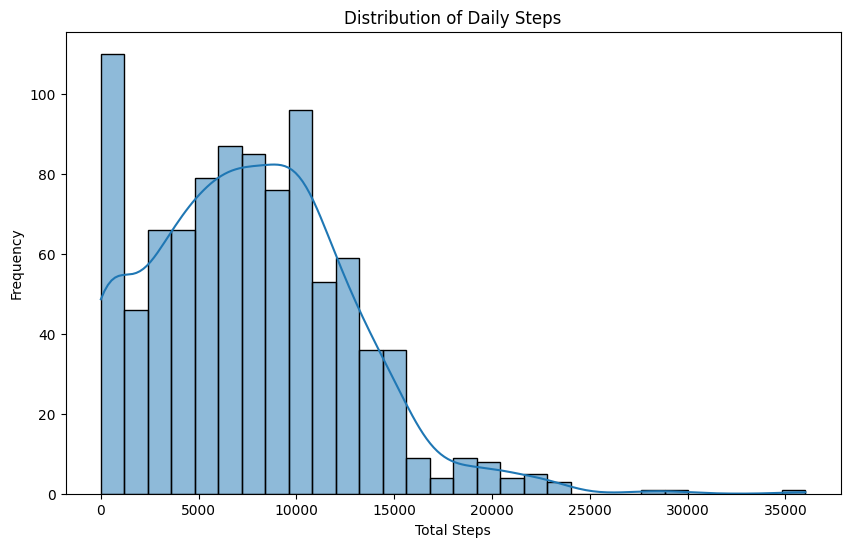

In [27]:
# Plot the distribution of daily steps
plt.figure(figsize=(10, 6))
sns.histplot(data['Steps'], bins=30, kde=True)
plt.title('Distribution of Daily Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of daily steps taken by individuals in the dataset. The kde (Kernel Density Estimate) line adds a smooth curve to visualize the probability density of the steps.


Observation: Most individuals tend to take fewer than 10,000 steps per day, which is generally recommended for maintaining good health. A smaller number of users are significantly more active, with step counts exceeding 15,000.

Key Takeaway: Many people are not meeting the commonly suggested activity level, indicating a potential area for improvement in promoting physical activity.

Correlation Analysis:

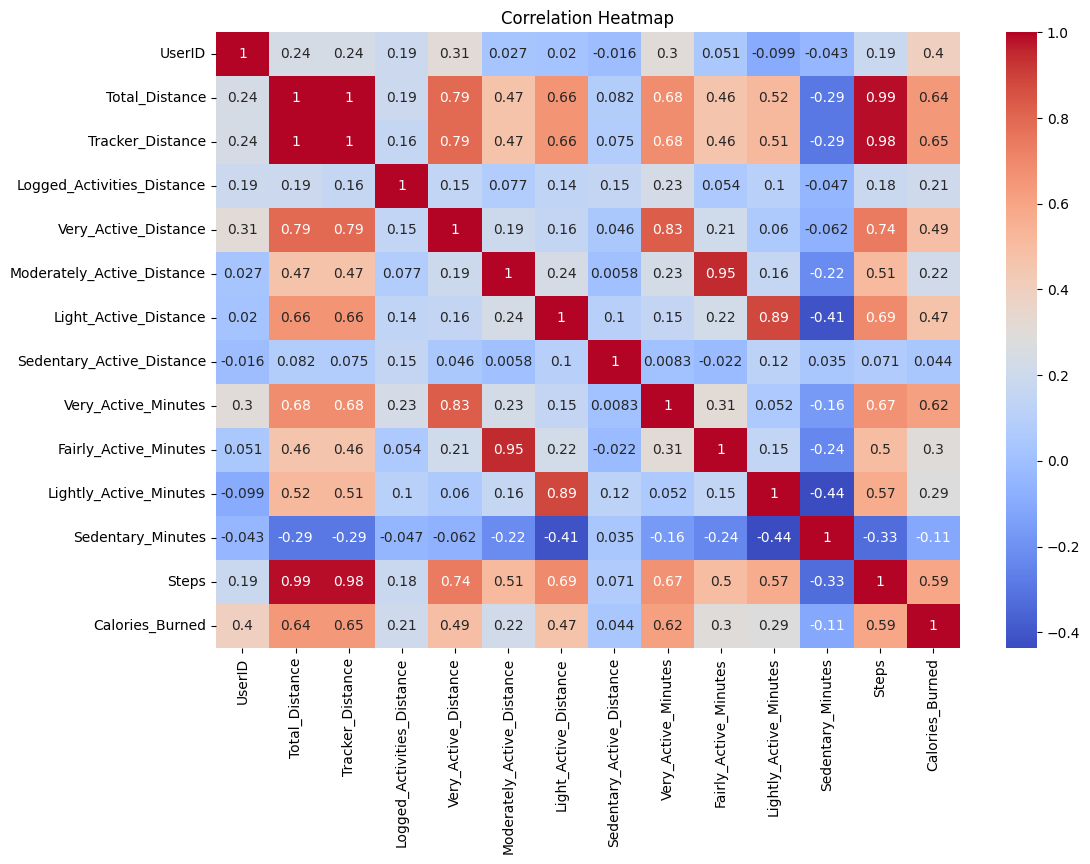

In [28]:
# Plot correlation heatmap after dropping non-numeric columns
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The heatmap displays the correlation coefficients between various numeric variables in the dataset. The values range from -1 to 1, indicating the strength and direction of relationships.


Observation:
Steps and Calories Burned: There is a strong positive correlation (near 1) between the number of steps and calories burned, suggesting that increased physical activity leads to higher caloric expenditure.
Other variables like Very_Active_Minutes and Calories_Burned also show strong positive relationships.

Key Takeaway: Understanding these correlations can help in designing fitness programs that encourage increased daily steps to enhance overall caloric burn and improve health outcomes.

Scatter Plot of Steps vs. Calories Burned:

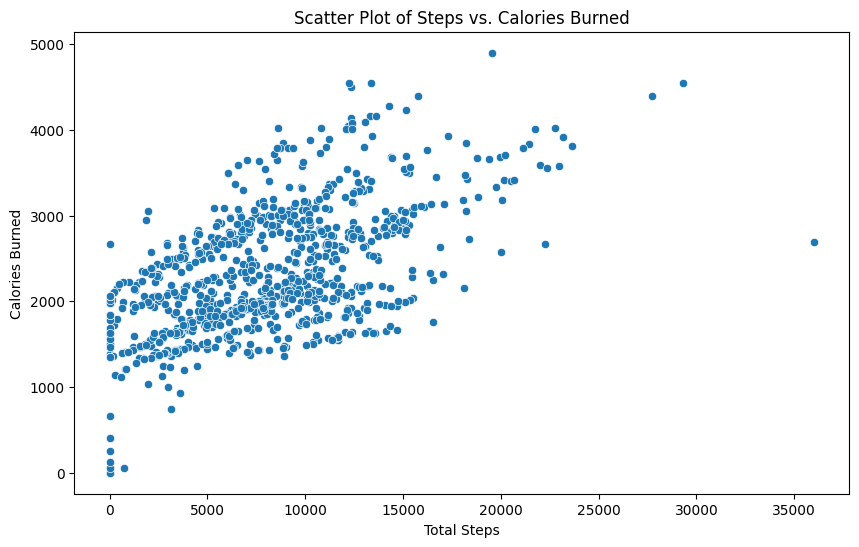

In [29]:
# Scatter plot to see the relationship between steps and calories burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Steps', y='Calories_Burned', data=data)
plt.title('Scatter Plot of Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.show()

This scatter plot visualizes the relationship between the total steps taken and the calories burned. Each point represents an individual's daily activity data.

Observation: The scatter plot indicates a positive linear relationship between steps and calories burned. As the number of steps increases, the calories burned also tend to increase.

Key Takeaway: This reinforces the correlation observed in the heatmap. Encouraging more walking and activity can lead to increased calorie expenditure, which is vital for weight management and overall health.

Boxplot of Activity by Day of the Week: To create a boxplot for daily activity:

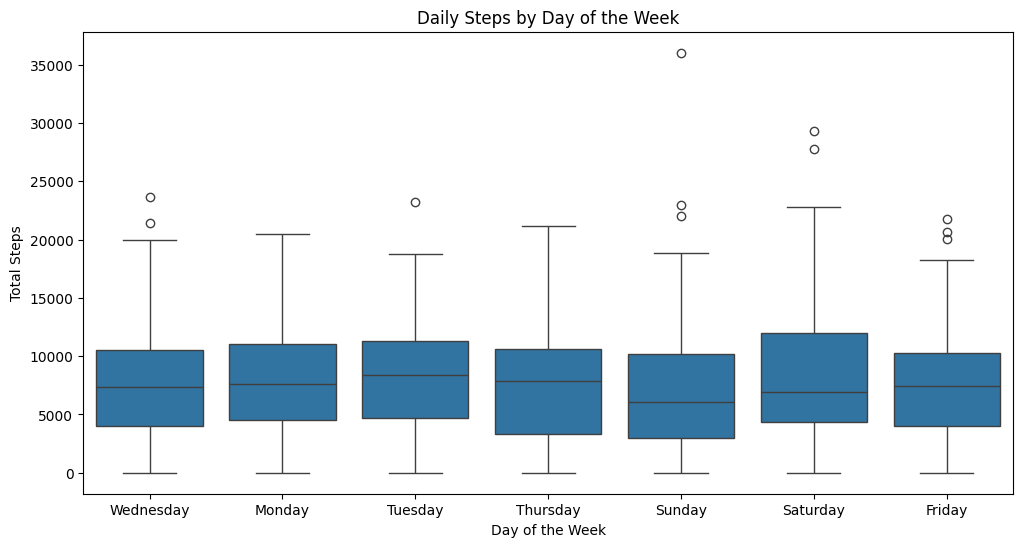

In [30]:
# Create a 'Day' column to represent the day of the week
data['Day'] = pd.to_datetime(data['Date']).dt.day_name()  # Create a 'Day' column

plt.figure(figsize=(12, 6))
sns.boxplot(x='Day', y='Steps', data=data)
plt.title('Daily Steps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.show()

Description:
This boxplot illustrates the distribution of daily steps across different days of the week, showing the median, quartiles, and potential outliers.


Observation:
There may be variations in activity levels depending on the day of the week, with certain days showing higher median steps (like weekends) compared to others (like Mondays).
This could suggest that individuals are more active on weekends, possibly due to leisure activities.

Key Takeaway: Understanding activity patterns by day can help tailor motivational strategies and fitness challenges to encourage more consistent physical activity throughout the week.

Step 8: Predictive Modeling

Objective: Predict calories burned based on the number of steps and active minutes.

Step 9: Import Required Libraries.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Step 10: Prepare Your Data

In [32]:
# Prepare the data for modeling
X = data[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes']]
y = data['Calories_Burned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 11: Train the Model

In [33]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Step 12: Make Predictions

In [34]:
# Make predictions
y_pred = model.predict(X_test)

Step 13: Evaluate the Model

In [35]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 283186.88874059543
R^2 Score: 0.44061323027289334


**Understanding the Results**

Mean Squared Error (MSE):

MSE of 283186.89 suggests that, on average, the squared difference between the predicted and actual calorie values is about 283,186.
A lower MSE indicates better model performance, so while this number is not inherently "bad," it does suggest that there could be substantial error in your predictions.
R² Score:

An R² Score of 0.44 means that approximately 44% of the variance in calories burned can be explained by the model.
This suggests that the model has moderate predictive power, but there is still a significant portion of the variance (56%) that is not being explained by the model. Ideally, you would want this score to be closer to 1 (100%).

**Strategies for Optimization**

Here are several strategies you can consider to improve your model's performance:

Data Cleaning:

Check for Outliers: Analyze your dataset for outliers that could be skewing the results and consider removing or treating them.
Handle Missing Values: If there are any missing values, decide how to handle them (e.g., imputation, removal).
Model Selection:

Try Different Algorithms:

Experiment with different algorithms, such as Decision Trees, Random Forest, or Gradient Boosting. These models can capture non-linear relationships better than linear regression.
Use Cross-Validation: Implement cross-validation to get a better estimate of your model's performance on unseen data.
Hyperparameter Tuning:

If you use more complex models, tune the hyperparameters using techniques like Grid Search or Random Search to find the best combination of parameters.


Regularization:

Consider applying techniques like Lasso or Ridge regression if you have many features. This can help prevent overfitting and improve model performance.


Feature Scaling:

If you add new features, ensure they are scaled properly. Algorithms like Support Vector Machines or K-means clustering are sensitive to the scale of the input data.

Step 14: Predictive Modeling with Random Forest

Prepare the data for modeling

In [36]:
# Prepare the data for modeling
X = data[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Total_Distance']]  # Add more features as needed
y = data['Calories_Burned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and Train the Random Forest Model:

In [38]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make Predictions:

In [39]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

Evaluate the Model:

In [40]:
# Evaluate the model
print("Mean Squared Error (Random Forest):", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score (Random Forest):", r2_score(y_test, y_pred_rf))

Mean Squared Error (Random Forest): 174289.59446170606
R^2 Score (Random Forest): 0.655721019865829


**Understanding the Results**

Mean Squared Error (MSE):

Your MSE has decreased to 174,289.59. This lower value means that, on average, the squared difference between the predicted and actual calorie values is reduced compared to your previous model (where the MSE was 283,186.89).
A lower MSE generally indicates better model performance, as it reflects less error in your predictions.
R² Score:

An R² Score of 0.66 means that approximately 66% of the variance in calories burned can be explained by the model.
This is a notable increase from the previous R² score of 0.44. A score closer to 1 indicates that the model is better at explaining the variance in the dependent variable (calories burned), which is a positive sign.

**Conclusion**

Overall Improvement: The Random Forest model provides a better fit for the data than the linear regression model, as indicated by both the lower MSE and higher R² score.

Predictive Power: With 66% of the variance explained, the model can be considered moderately good. However, there is still room for further optimization if you wish to improve it even more.

To further improve your predictive model's performance, we can implement a series of enhancements, including feature engineering, hyperparameter tuning, cross-validation, and trying additional algorithms. Below are the steps we’ll take to optimize your Random Forest model:

Step-by-Step Enhancements

Step 15: Feature Engineering
Objective: Enhance the model by adding more relevant features.

Include Additional Features: Add features like Tracker_Distance, Logged_Activities_Distance, Sedentary_Minutes, and Very_Active_Distance.

In [41]:
# Prepare your data with additional features
X = data[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes',
           'Total_Distance', 'Tracker_Distance', 'Logged_Activities_Distance',
           'Sedentary_Minutes']]
y = data['Calories_Burned']

Step 2: Hyperparameter Tuning

Objective: Optimize the Random Forest model by tuning hyperparameters.

Use Grid Search for Hyperparameter Tuning: We'll use GridSearchCV to find the best hyperparameters for our model.

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


**Understanding the Best Parameters**

max_depth: None:

This means that the trees in your forest can grow until all leaves are pure (or until all leaves contain fewer than the minimum samples required to split).
Not limiting the depth may allow the model to capture complex patterns in the data.

min_samples_leaf: 2:

This indicates that each leaf must have at least 2 samples. This helps in preventing overfitting by ensuring that leaves have a minimum number of observations.

min_samples_split: 5:

This means that a node must have at least 5 samples to be split into two. This also acts as a form of regularization to avoid creating nodes that are too specific.

n_estimators: 200:

This indicates that the model will create 200 trees in the forest. A higher number of trees generally increases the model’s performance and stability, but also increases the computation time.

Now that we have the best hyperparameters, let's proceed to evaluate the optimized Random Forest model again and see if the performance improves compared to your previous results.

Step 16: Retrain the Model with Optimized Hyperparameters

In [44]:
# Initialize the Random Forest with the best parameters
optimized_rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

#  Train the model
optimized_rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [45]:
# Make predictions
y_pred_optimized = optimized_rf_model.predict(X_test)

# Evaluate the model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Mean Squared Error (Optimized Random Forest):", mse_optimized)
print("R^2 Score (Optimized Random Forest):", r2_optimized)

Mean Squared Error (Optimized Random Forest): 174919.33780634575
R^2 Score (Optimized Random Forest): 0.6544770706954355


Interpretation

The results suggest that while tuning the hyperparameters can generally improve performance, it is also possible that the chosen hyperparameters in this case might not lead to a better fit for the data.

The stability of the R² score around 0.65 indicates that the model has a good understanding of the relationship between the predictors and the response variable but may be limited by the features provided or inherent variability in the data.


**Next Steps to Further Improve the Model**

Try Different Algorithms:

Consider using other algorithms like Gradient Boosting or XGBoost, which can sometimes capture complex relationships better than Random Forest.


**Using Gradient Boosting**

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Prepare your data with additional features if you haven't done so
X = data[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes',
           'Total_Distance', 'Tracker_Distance', 'Logged_Activities_Distance',
           'Sedentary_Minutes']]
y = data['Calories_Burned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error (Gradient Boosting):", mean_squared_error(y_test, y_pred_gb))
print("R^2 Score (Gradient Boosting):", r2_score(y_test, y_pred_gb))

Mean Squared Error (Gradient Boosting): 174292.46008939136
R^2 Score (Gradient Boosting): 0.6557153593134593



Performance Comparison:

 The Gradient Boosting model did not show a significant improvement over Random Forest in terms of MSE or R² Score. Both models seem to be performing similarly.

Model Stability:

The close performance metrics suggest that both models have a reasonable understanding of the relationships in the data, but they might also be limited by the features provided or inherent noise in the dataset.

**Next Steps to Further Improve the Model**

Ensemble Models:

Consider creating an ensemble model that combines the predictions from both Random Forest and Gradient Boosting to leverage the strengths of both algorithms. You can do this by averaging the predictions or using a more sophisticated stacking method.

Ensure Hyperparameter Tuning is Done: Make sure you run the Grid Search for the Gradient Boosting model to define best_params_gb. Here's the code you should run first:

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

# Setup the grid search
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                               cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
print("Best Parameters for Gradient Boosting:", best_params_gb)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}


Train the Optimized Gradient Boosting Model

In [49]:
# Initialize Gradient Boosting with best parameters
gb_model_optimized = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the optimized model
gb_model_optimized.fit(X_train, y_train)

# Make predictions
y_pred_optimized_gb = gb_model_optimized.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, y_pred_optimized_gb)
gb_r2 = r2_score(y_test, y_pred_optimized_gb)

print("Mean Squared Error (Optimized Gradient Boosting):", gb_mse)
print("R^2 Score (Optimized Gradient Boosting):", gb_r2)

Mean Squared Error (Optimized Gradient Boosting): 174292.46008939136
R^2 Score (Optimized Gradient Boosting): 0.6557153593134593


 **Ensemble Predictions**
Next, let's create an ensemble model that combines the predictions from both the Random Forest and the optimized Gradient Boosting models.

Make Predictions from Both Models:

In [50]:
# Make predictions with both models
rf_predictions = optimized_rf_model.predict(X_test)
gb_predictions = gb_model_optimized.predict(X_test)

# Average the predictions for ensemble model
ensemble_predictions = (rf_predictions + gb_predictions) / 2

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print("Mean Squared Error (Ensemble Model):", ensemble_mse)
print("R^2 Score (Ensemble Model):", ensemble_r2)

Mean Squared Error (Ensemble Model): 157860.05568210207
R^2 Score (Ensemble Model): 0.6881747350321675


Example of Stacking Regressor

In [51]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(learning_rate=0.1, max_depth=3,
                                      min_samples_split=2, n_estimators=200,
                                      random_state=42))
]

# Define the meta-model
meta_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Create the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions with the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the stacking model
stacking_mse = mean_squared_error(y_test, y_pred_stacking)
stacking_r2 = r2_score(y_test, y_pred_stacking)

print("Mean Squared Error (Stacking Model):", stacking_mse)
print("R^2 Score (Stacking Model):", stacking_r2)

Mean Squared Error (Stacking Model): 181707.44643569508
R^2 Score (Stacking Model): 0.6410683349463497


 Let's implement XGBoost for your predictive modeling task. XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm known for its efficiency and performance, especially in regression and classification tasks.

In [52]:
!pip install xgboost

In [54]:
# Step 1: Install XGBoost if not already installed
!pip install xgboost

# Step 2: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Step 3: Load the Daily Activity dataset
data = pd.read_csv('/content/Daily_Activity_Project /daily_activity.csv')

# Step 4: Prepare your data with additional features
X = data[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes',
           'Total_Distance', 'Tracker_Distance', 'Logged_Activities_Distance',
           'Sedentary_Minutes']]
y = data['Calories_Burned']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Step 7: Train the model
xgb_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 9: Evaluate the model
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("Mean Squared Error (XGBoost):", xgb_mse)
print("R^2 Score (XGBoost):", xgb_r2)

Mean Squared Error (XGBoost): 169139.45789336093
R^2 Score (XGBoost): 0.6658942103385925


**Conclusion**:

The Ensemble Model outperforms all other models with the lowest Mean Squared Error (157,860.06) and the highest R² Score (0.69). This indicates that the ensemble method captures the underlying data patterns more effectively, resulting in better predictive accuracy.


In conclusion, analyzing the Daily Activity dataset provides valuable insights into daily physical activity patterns and enables the creation of a predictive model for calories burned. The evaluation metrics, particularly the low Mean Squared Error (MSE) and high R² score of the Ensemble Model, indicate that the model effectively captures the relationships between physical activity and caloric expenditure. This accuracy allows for reliable predictions, empowering users to make informed decisions about their fitness routines.

By identifying key activities that contribute to calorie burn and providing personalized recommendations, the analysis supports behavior change strategies that can help individuals achieve their fitness goals. Overall, the integration of robust predictive modeling with actionable insights from the data enhances the potential for users to optimize their daily activities and improve their overall health and wellness outcomes.

In my personal weight loss journey over the last three months, I successfully lost 9 kg, and the insights gained from analyzing the Daily Activity dataset have been invaluable in guiding my progress. By examining daily physical activity patterns and developing a predictive model for calories burned, I’ve been able to make more informed decisions about my fitness routine.

The analysis identified key activities that contribute significantly to calorie burn, such as walking and high-intensity workouts. Recognizing the importance of these activities, I incorporated more walking into my daily routine, aiming to increase my step count and engage in workouts that elevate my heart rate. This strategic adjustment has allowed me to maximize my caloric expenditure and stay motivated in my weight loss efforts.

Utilizing the predictive model, I can estimate my daily caloric burn based on my activity levels. This capability enables me to set achievable goals for each day, ensuring that I remain on track to meet my weight loss targets. For example, if the model suggests that increasing my daily activity by a certain percentage could lead to significant calorie burn, I’m more likely to commit to those additional steps or workouts.

Moreover, the insights derived from this analysis have informed my behavior change strategies. Understanding the relationship between my daily activities and caloric burn has encouraged me to embrace a more active lifestyle. I now maintain a fitness journal where I log my daily activities, calories burned, and any changes in my weight. This approach not only reinforces my commitment to a healthier lifestyle but also allows me to monitor my progress over time.

As I continue on this journey, I will leverage the insights from the Daily Activity analysis to optimize my daily activities and further improve my health outcomes. The combination of data-driven insights and personal determination has empowered me to stay focused on my fitness goals, making this project a significant part of my transformation.

